In [1]:
import pandas as pd
train = pd.read_csv('./실습데이터/titanic_train.csv')
test = pd.read_csv('./실습데이터/titanic_test.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
# train로 살았는지 죽었는지 모델 만들고, test로 예측이 되나 안되나 보는것 

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#결측치를 파악한다.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#결측지를 파악한다
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#데이터를 시각화해서 의미를 파악한다.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [9]:
train.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S


In [10]:
a,_ = train[train['Survived']==1]['Sex'].value_counts()

In [11]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
#특징을 주고 산사람 죽은사람 나눔
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    #seaborn 그래프가 더 이쁜데 seaborn 그래프는 기본적으로 pandas로 던져야 그릴 수 있음
    df.plot(kind='bar', stacked=True, figsize=(10,5))

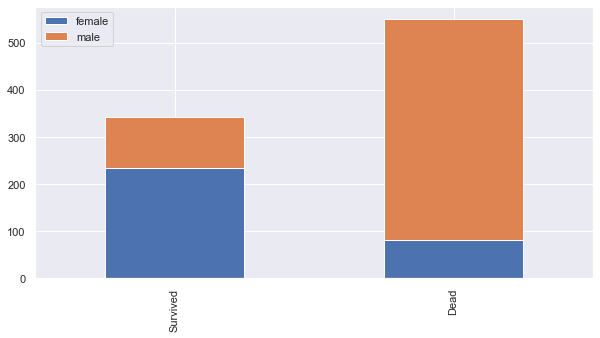

In [13]:
bar_chart('Sex')

In [14]:
temp = train[train['Survived']==1]['Pclass'].value_counts()

In [15]:
temp

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [16]:
female, male= train[train['Survived']==1]['Sex'].value_counts()

In [17]:
female

233

In [18]:
male

109

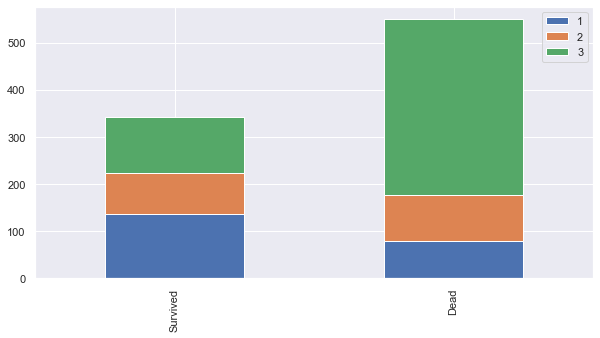

In [19]:
bar_chart('Pclass')

In [20]:
temp = train[train['Survived']==1]['Pclass'].value_counts()

In [21]:
len(temp)

3

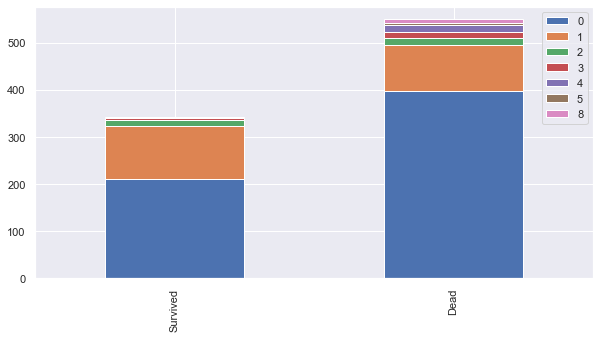

In [22]:
bar_chart('SibSp')

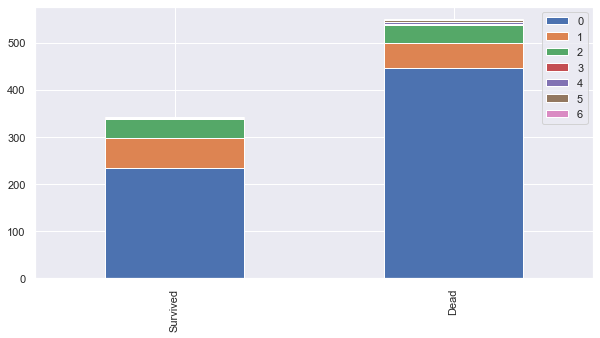

In [23]:
bar_chart('Parch')

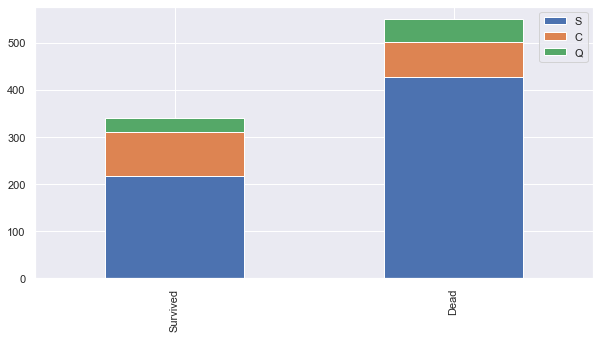

In [24]:
bar_chart('Embarked')

In [25]:
#나이 결측치를 채우기 위한 기법
#이름을 보니 Mr, Miss, Master 등이 있어 이 정보를 활용하면 좋겠다

train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [26]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Countess      1
Don           1
Lady          1
Ms            1
Jonkheer      1
Sir           1
Capt          1
Name: Title, dtype: int64

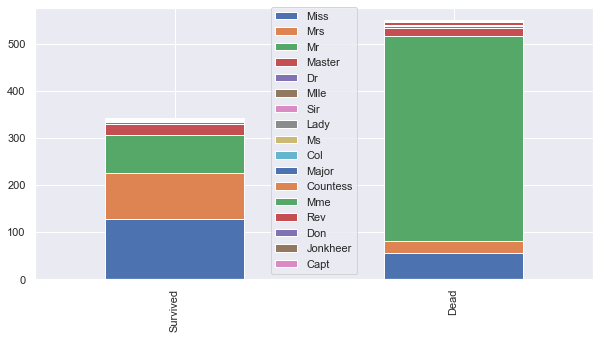

In [27]:
bar_chart('Title')

In [28]:
title_mapping = {'Mr' : 0, 'Miss': 1, 'Mrs': 2,
                'Master':3, 'Dr':3, 'Mlle':3, 'Lady':3, 'Sir':3, 'Ms':3, 'Col':3,'Mme':3,
                'Countess':3,'Major':3,'Rev':3,'Don':3, 'Dona':3,'Jonkheer':3,'Capt':3}
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

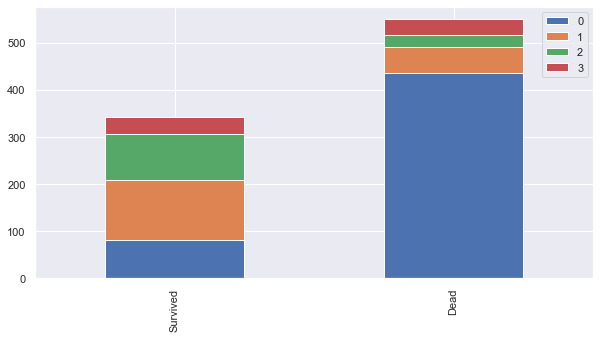

In [29]:
bar_chart('Title')

In [30]:
train.drop('Name', axis=1, inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [32]:
test.drop('Name', axis=1, inplace=True)

In [33]:
sex_mapping = { 'female' : 0, 'male' : 1}
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [34]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
675,676,0,3,1,18.0,0,0,349912,7.7750,NaN,S,0
156,157,1,3,0,16.0,0,0,35851,7.7333,NaN,Q,1
528,529,0,3,1,39.0,0,0,3101296,7.9250,NaN,S,0
272,273,1,2,0,41.0,0,1,250644,19.5000,NaN,S,2
268,269,1,1,0,58.0,0,1,PC 17582,153.4625,C125,S,2
746,747,0,3,1,16.0,1,1,C.A. 2673,20.2500,NaN,S,0
518,519,1,2,0,36.0,1,0,226875,26.0000,NaN,S,2
404,405,0,3,0,20.0,0,0,315096,8.6625,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0
731,732,0,3,1,11.0,0,0,2699,18.7875,NaN,C,0


In [35]:
#age 값을 title 묶어서 median 값으로 처리하기
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [36]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0


In [37]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,1,35.0,0,0,359309,8.0500,NaN,S,0


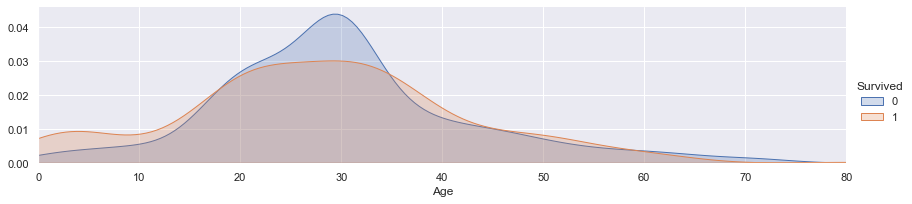

In [38]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

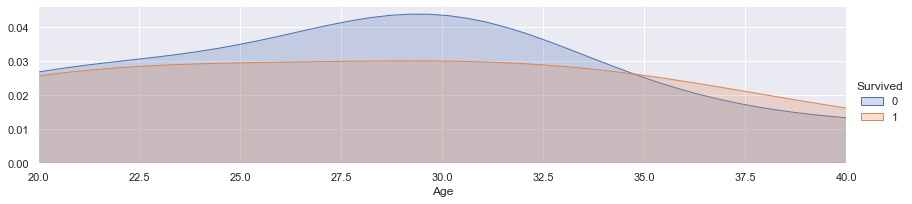

In [39]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Age', shade=True)
# facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,40) # 이 구간으로 range를 정해주면 그 부분을 좀 더 자세히 볼 수 있다.
plt.show()

(20.0, 40.0)

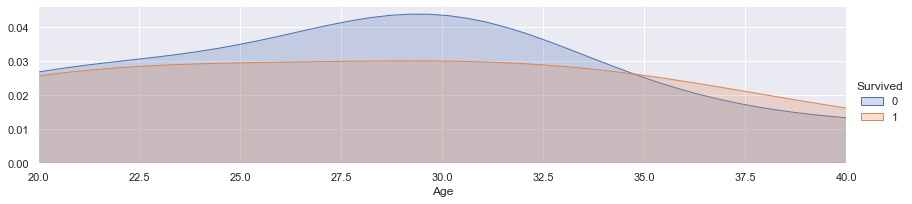

In [40]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade =True)
#이 기법 나중에 환율 설명할때 사용해보기
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
#0에서 20대까지 focus해서 보고싶을때 부분만 보고싶을때 사용
plt.xlim(20,40)

(40.0, 80.0)

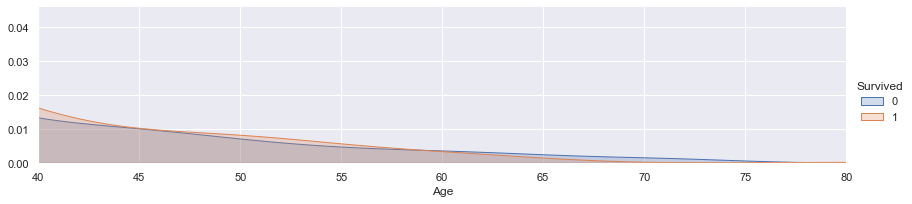

In [41]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade =True)
#이 기법 나중에 환율 설명할때 사용해보기
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
#0에서 20대까지 focus해서 보고싶을때 부분만 보고싶을때 사용
plt.xlim(40)

In [42]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
707,708,1,1,1,42.0,0,0,PC 17476,26.2875,E24,S,0
697,698,1,3,0,21.0,0,0,35852,7.7333,NaN,Q,1
179,180,0,3,1,36.0,0,0,LINE,0.0000,NaN,S,0
783,784,0,3,1,30.0,1,2,W./C. 6607,23.4500,NaN,S,0
885,886,0,3,0,39.0,0,5,382652,29.1250,NaN,Q,2
780,781,1,3,0,13.0,0,0,2687,7.2292,NaN,C,1
8,9,1,3,0,27.0,0,2,347742,11.1333,NaN,S,2
232,233,0,2,1,59.0,0,0,237442,13.5000,NaN,S,0
413,414,0,2,1,30.0,0,0,239853,0.0000,NaN,S,0
462,463,0,1,1,47.0,0,0,111320,38.5000,E63,S,0


In [43]:
#또 다른 바이닝을 해보자
#나이를 아동:0, 청년:1, 성인:2, 중장년:3, 시니어:4
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age']=1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age']=2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age']=3
    dataset.loc[dataset['Age']>62, 'Age'] = 4

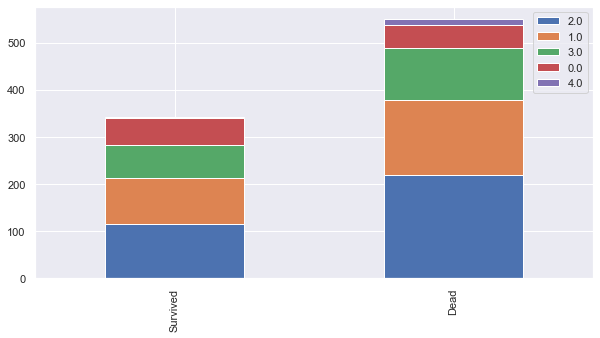

In [44]:
bar_chart('Age')

In [45]:
train.sample(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
876,877,0,3,1,1.0,0,0,7534,9.8458,NaN,S,0
516,517,1,2,0,2.0,0,0,C.A. 34260,10.5000,F33,S,2
793,794,0,1,1,2.0,0,0,PC 17600,30.6958,NaN,C,0
69,70,0,3,1,1.0,2,0,315151,8.6625,NaN,S,0
701,702,1,1,1,2.0,0,0,PC 17475,26.2875,E24,S,0
35,36,0,1,1,3.0,1,0,113789,52.0000,NaN,S,0
193,194,1,2,1,0.0,1,1,230080,26.0000,F2,S,3
288,289,1,2,1,3.0,0,0,237798,13.0000,NaN,S,0
788,789,1,3,1,0.0,1,2,C.A. 2315,20.5750,NaN,S,3
531,532,0,3,1,2.0,0,0,2641,7.2292,NaN,C,0


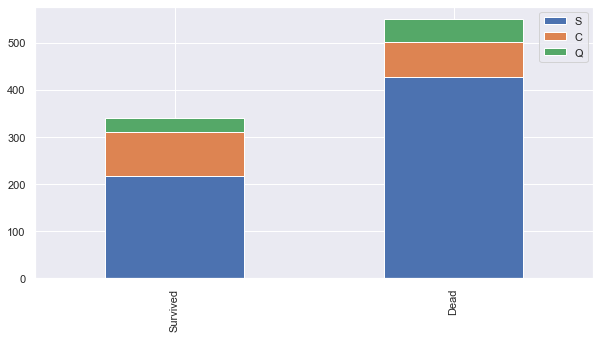

In [46]:
bar_chart('Embarked')

In [47]:
train[train['Pclass']==1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,S,0
11,12,1,1,0,3.0,0,0,113783,26.5500,C103,S,1
23,24,1,1,1,2.0,0,0,113788,35.5000,A6,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,0,3.0,1,1,11751,52.5542,D35,S,2
872,873,0,1,1,2.0,0,0,695,5.0000,B51 B53 B55,S,0
879,880,1,1,0,3.0,0,1,11767,83.1583,C50,C,2
887,888,1,1,0,1.0,0,0,112053,30.0000,B42,S,1


<AxesSubplot:>

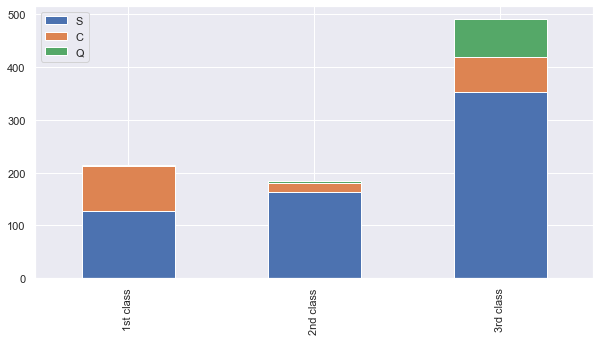

In [48]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [50]:
#왜냐하면 위에 그래프에서 1등석에서 3등석까지 모두 S가 50% 이상이였기 때문에
#embarked의 결측지를 모든 Pclass에서 50%가 넘는 S로 넣을것
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [51]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [52]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
712,713,1,1,1,3.0,1,0,19996,52.0000,C126,0,0
191,192,0,2,1,1.0,0,0,28424,13.0000,NaN,0,0
378,379,0,3,1,1.0,0,0,2648,4.0125,NaN,1,0
239,240,0,2,1,2.0,0,0,SCO/W 1585,12.2750,NaN,0,0
424,425,0,3,1,1.0,1,1,370129,20.2125,NaN,0,0
862,863,1,1,0,3.0,0,0,17466,25.9292,D17,0,2
844,845,0,3,1,1.0,0,0,315090,8.6625,NaN,0,0
248,249,1,1,1,3.0,1,1,11751,52.5542,D35,0,0
109,110,1,3,0,1.0,1,0,371110,24.1500,NaN,2,1
414,415,1,3,1,3.0,0,0,STON/O 2. 3101269,7.9250,NaN,0,0


In [53]:
#Fare 데이터 결측지 확인
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


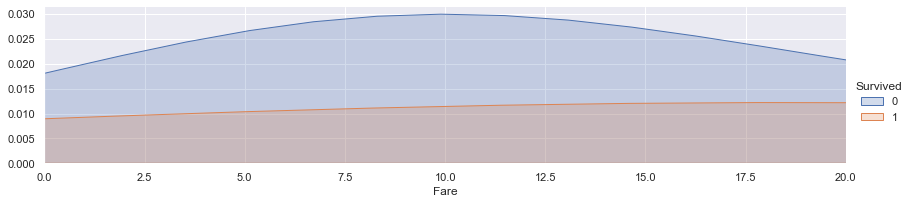

In [55]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

In [56]:
#Fare Bining
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare']=1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100), 'Fare']=2
    dataset.loc[dataset['Fare']>100, 'Fare'] = 3

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [58]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E17            1
F G63          1
B39            1
A7             1
C30            1
Name: Cabin, Length: 147, dtype: int64

In [59]:
#Cabin binning
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

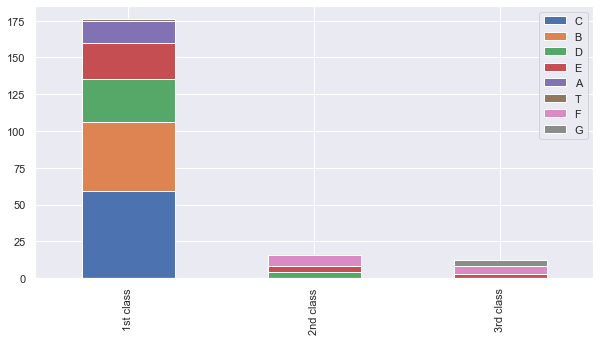

In [60]:
# Cabin 별로 1등석, 2등석, 3등석 몇명이 탑승했는지 알아보려고
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [61]:
cabin_mapping = {'A':0, 'B':0.5, 'C':1,'D':1.5, 'E':2, 'F':2.5,'G':3, 'T':3.5}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [62]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 83.7+ KB


In [64]:
train['FamilySize'] = train['SibSp']+train['Parch'] + 1 # 더하기 1은 나를 포함
test['FamilySize'] = test['SibSp']+test['Parch'] + 1 # 더하기 1은 나를 포함

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
 12  FamilySize   891 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 90.6+ KB


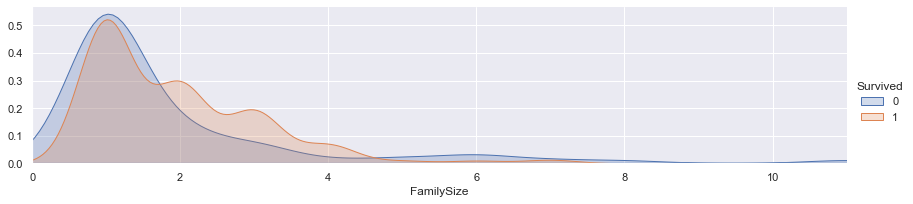

In [66]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.show()

In [67]:
train['FamilySize'].max()

11

In [68]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [69]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.50,0,0,0.4
1,2,1,1,0,3.0,1,0,PC 17599,2.0,1.00,1,2,0.4
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.50,0,1,0.0
3,4,1,1,0,2.0,1,0,113803,2.0,1.00,0,2,0.4
4,5,0,3,1,2.0,0,0,373450,0.0,2.50,0,0,0.0
5,6,0,3,1,2.0,0,0,330877,0.0,2.50,2,0,0.0
6,7,0,1,1,3.0,0,0,17463,2.0,2.00,0,0,0.0
7,8,0,3,1,0.0,3,1,349909,1.0,2.50,0,3,1.6
8,9,1,3,0,2.0,0,2,347742,0.0,2.50,0,2,0.8
9,10,1,2,0,0.0,1,0,237736,2.0,2.25,1,2,0.4


In [70]:
#sibsp, parch, ticket 지우기
features_drop = ['Ticket', 'SibSp','Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [71]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,0.0,2.50,0,0,0.4
1,2,1,1,0,3.0,2.0,1.00,1,2,0.4
2,3,1,3,0,1.0,0.0,2.50,0,1,0.0
3,4,1,1,0,2.0,2.0,1.00,0,2,0.4
4,5,0,3,1,2.0,0.0,2.50,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0.0,2.25,0,3,0.0
887,888,1,1,0,1.0,1.0,0.50,0,1,0.0
888,889,0,3,0,1.0,1.0,2.50,0,1,1.2
889,890,1,1,1,1.0,1.0,1.00,1,0,0.0


In [72]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,1,2.0,0.0,2.5,2,0,0.0
1,893,3,0,3.0,0.0,2.5,0,2,0.4
2,894,2,1,3.0,0.0,2.5,2,0,0.0
3,895,3,1,2.0,0.0,2.5,0,0,0.0
4,896,3,0,1.0,0.0,2.5,0,2,0.8
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0.0,2.5,0,0,0.0
414,1306,1,0,3.0,3.0,1.0,1,3,0.0
415,1307,3,1,3.0,0.0,2.5,0,0,0.0
416,1308,3,1,2.0,0.0,2.5,0,0,0.0


In [73]:
#train = train.drop(['PassengerId'], axis=1)

In [74]:
#test = test.drop(['PassengerId'], axis=1)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    int64  
 9   FamilySize   891 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 69.7 KB


In [76]:
train = train.dropna()

In [77]:
train.Title[train['Title'].isna()]

Series([], Name: Title, dtype: int64)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Cabin        891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Title        891 non-null    int64  
 9   FamilySize   891 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 76.6 KB


In [79]:
X = train.iloc[:,1:9]
y = train.Survived

In [80]:
X.shape, y.shape

((891, 8), (891,))

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

In [82]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [83]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=k_fold, scoring=scoring)
print(score)

[0.93333333 0.8988764  0.93258427 0.95505618 0.96629213 0.96629213
 0.91011236 0.95505618 0.92134831 0.96629213]


In [84]:
print(score.mean())

0.9405243445692884


In [85]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=k_fold, scoring=scoring)
print(score)
print("DecisionTree score=", score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
DecisionTree score= 1.0


In [86]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=k_fold, scoring=scoring)
print(score)
print("RandomForest score=", score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
RandomForest score= 1.0


In [87]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X,y, cv=k_fold, scoring=scoring)
print(score)
print("SVM score=", score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
SVM score= 1.0


In [88]:
# SVM 이 좋다는 것으로 판명이 되어 SVC로 다시 학습후 predict
clf = SVC()
clf.fit(X,y)

SVC()

In [89]:
test.shape

(418, 9)

In [90]:
test_data = test.drop(['PassengerId'], axis=1).copy()

In [91]:
prediction = clf.predict(test_data)

In [92]:
submission = pd.DataFrame({
    'PassengerId' : test['PassengerId'],
    'Survived' : prediction
})

submission.to_csv('submission.csv', index=False)

In [93]:
submission = pd.read_csv('submission.csv')

In [94]:
submission.head(10)

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1
